In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from libsvm.svmutil import * 
import time
from sklearn.utils import shuffle
import random
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import cm


In [2]:

data=open('feat_25_prob1.csv',mode='r')
lines_list=data.readlines()
number_of_class=10

In [71]:
## Multiclass classification

In [72]:

matrix=[]
for line in lines_list:
        row=[]
        for val in line.split(','):
                var =float(val)
                row.append(var)
        matrix.append(row)
data.close()
matrix=shuffle(matrix)
matrix_rows=len(matrix)
matrix_cols=len(matrix[0])

row_1=[row[0] for row in matrix]
row_2=[row[1] for row in matrix]
row_3=[row[2] for row in matrix]
row_4=[row[3] for row in matrix]
row_5=[row[4] for row in matrix]
row_6=[row[5] for row in matrix]
row_7=[row[6] for row in matrix]
row_8=[row[7] for row in matrix]
row_9=[row[8] for row in matrix]
row_10=[row[9] for row in matrix]
row_11=[row[10] for row in matrix]
row_12=[row[11] for row in matrix]
row_13=[row[12] for row in matrix]
row_14=[row[13] for row in matrix]
row_15=[row[14] for row in matrix]
row_16=[row[15] for row in matrix]
row_17=[row[16] for row in matrix]
row_18=[row[17] for row in matrix]
row_19=[row[18] for row in matrix]
row_20=[row[19] for row in matrix]
row_21=[row[20] for row in matrix]
row_22=[row[21] for row in matrix]
row_23=[row[22] for row in matrix]
row_24=[row[23] for row in matrix]
row_25=[row[24] for row in matrix]
output=[row[25] for row in matrix]


x=[]
for row in matrix:
        r=[]
        r.append(row[0])
        r.append(row[1])
        r.append(row[2])
        r.append(row[3])
        r.append(row[4])
        r.append(row[5])
        r.append(row[6])
        r.append(row[7])
        r.append(row[8])
        r.append(row[9])
        r.append(row[10])
        r.append(row[11])
        r.append(row[12])
        r.append(row[13])
        r.append(row[14])
        r.append(row[15])
        r.append(row[16])
        r.append(row[17])
        r.append(row[18])
        r.append(row[19])
        r.append(row[20])
        r.append(row[21])
        r.append(row[22])
        r.append(row[23])
        r.append(row[24])
        x.append(r)

Total_instances=matrix_rows
Trainning_instances=int(matrix_rows*0.8)        
testing_instances=int(matrix_rows-Trainning_instances)

In [73]:
Tstart=time.time()

prob=svm_problem(output[0:Trainning_instances],x[0:Trainning_instances])
param=svm_parameter('-s 0 -c 1 -t 1 -g 3  -d 2 ')  ## change s and t(('-s 0 -c 1 -t 1 -g 3  -d 2 ') good combination)
model=svm_train(prob,param)
#s---> SVM type
#d---> degree
#t--->kernal type
#c--->margin type(soft/hard
#g---> gamma in kernal funtion
Tend=time.time()
print('Time to Train(ms)=',(Tend-Tstart)*1000)

Time to Train(ms)= 489.40515518188477


In [74]:
p_label,p_acc,p_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],model)
p_acc

Accuracy = 90.8333% (545/600) (classification)


(90.83333333333333, 1.76, 0.7986446766504314)

In [75]:
report=metrics.confusion_matrix(output[Trainning_instances:Total_instances],p_label)
# sklearn.metrics.confusion_matrix
report
cm_df = pd.DataFrame(report,
                     index = ['0','1','2','3','4','5','6','7','8','9'], #,labels=["0", "1", "2","3", "4", "5","6", "7", "8","9"]
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
cm_df

,0,1,2,3,4,5,6,7,8,9
0,60,0,0,0,0,0,2,0,0,0
1,0,67,0,0,0,0,0,0,2,0
2,1,0,49,1,1,0,0,1,3,0
3,1,1,0,57,1,0,0,0,2,4
4,0,0,1,0,54,1,0,1,3,1
5,0,1,0,0,1,56,1,0,4,1
6,0,0,0,0,1,1,53,0,0,0
7,0,0,0,0,1,0,0,60,1,3
8,1,2,1,1,1,2,1,0,37,1
9,0,0,1,0,1,1,0,0,0,52


In [76]:
metrics.classification_report(output[Trainning_instances:Total_instances],p_label,output_dict=True)

{'0.0': {'precision': 0.9523809523809523,
  'recall': 0.967741935483871,
  'f1-score': 0.96,
  'support': 62},
 '1.0': {'precision': 0.9436619718309859,
  'recall': 0.9710144927536232,
  'f1-score': 0.9571428571428571,
  'support': 69},
 '2.0': {'precision': 0.9423076923076923,
  'recall': 0.875,
  'f1-score': 0.9074074074074073,
  'support': 56},
 '3.0': {'precision': 0.9661016949152542,
  'recall': 0.8636363636363636,
  'f1-score': 0.912,
  'support': 66},
 '4.0': {'precision': 0.8852459016393442,
  'recall': 0.8852459016393442,
  'f1-score': 0.8852459016393442,
  'support': 61},
 '5.0': {'precision': 0.9180327868852459,
  'recall': 0.875,
  'f1-score': 0.8959999999999999,
  'support': 64},
 '6.0': {'precision': 0.9298245614035088,
  'recall': 0.9636363636363636,
  'f1-score': 0.9464285714285715,
  'support': 55},
 '7.0': {'precision': 0.967741935483871,
  'recall': 0.9230769230769231,
  'f1-score': 0.9448818897637796,
  'support': 65},
 '8.0': {'precision': 0.7115384615384616,
  're

In [77]:
# Crossvalidation(parameter(c-->penalisation,g-->margins,t-->type of kernel))
prob=svm_problem(output[0:Trainning_instances],x[0:Trainning_instances])
Tstart=time.time()
param=svm_parameter("-q")
results=[]
results_pred=[]
for c in range(-3,10):
        for g in range(-8,10):
                for t in range(0,4):
                        for d in range(1,5):
                                print(f'C={c},gamma={g},kernaltype={t},degree={d}')
                                param.C,param.gamma,param.kernel_type,param.degree =2**c,2**g,t,d## iterating parameters
                                m=svm_train(prob,param)## Trainning model on problem defined above and parameter combination in loop
                                p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)## Accurecy calculation for train data
                                pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)## Accurecy calculation for test data
                                print('Test accuracy=',pred_acc)
                                results.append([param.C,param.gamma,param.kernel_type,param.degree,p_acc[0]])
                                results_pred.append([param.C,param.gamma,param.kernel_type,param.degree,pred_acc[0]])
Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart))
result_df=pd.DataFrame(results)
result_df_pred=pd.DataFrame(results_pred)



## polynomial and linear are taking longer time than the RBF and other kernel !!!!!

C=-3,gamma=-8,kernaltype=0,degree=1
Accuracy = 92.5833% (2222/2400) (classification)
Accuracy = 90% (540/600) (classification)
Test accuracy= (90.0, 1.4083333333333334, 0.8355743254221609)
C=-3,gamma=-8,kernaltype=0,degree=2
Accuracy = 92.5833% (2222/2400) (classification)
Accuracy = 90% (540/600) (classification)
Test accuracy= (90.0, 1.4083333333333334, 0.8355743254221609)
C=-3,gamma=-8,kernaltype=0,degree=3
Accuracy = 92.5833% (2222/2400) (classification)
Accuracy = 90% (540/600) (classification)
Test accuracy= (90.0, 1.4083333333333334, 0.8355743254221609)
C=-3,gamma=-8,kernaltype=0,degree=4
Accuracy = 92.5833% (2222/2400) (classification)
Accuracy = 90% (540/600) (classification)
Test accuracy= (90.0, 1.4083333333333334, 0.8355743254221609)
C=-3,gamma=-8,kernaltype=1,degree=1
Accuracy = 70.7083% (1697/2400) (classification)
Accuracy = 70.1667% (421/600) (classification)
Test accuracy= (70.16666666666667, 5.243333333333333, 0.5893366684394232)
C=-3,gamma=-8,kernaltype=1,degree=2
Ac

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(result_df[4][0:200],label='Prediction_accuracy')
plt.plot(result_df_pred[4][0:200],label='Trainning accuracy')
plt.title("Accurecy for CV on Trainning and test data(first 200 iteration)")
plt.xlabel('iteration_number')
plt.ylabel('Accuracy')
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show

In [ ]:
# Overfit/underfit/generalfit check

bestIDx=np.argmax(np.array(results)[:,4])
worstIDX=np.argmin(np.array(results)[:,4])
print('best parameter',results[bestIDx])
print('worst parameter',results[worstIDX])
# pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

print('Testing on best parameter')
resultnp=np.array(results)
param.C=resultnp[bestIDx,0]
param.gamma=resultnp[bestIDx,1]
ker=resultnp[bestIDx,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[bestIDx,3])
m=svm_train(prob,param)
print('Train accurecy for best parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for best parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

## giving good results as it is not trainned to predict just one classs

# resultnp=np.array(results)
print('Testing on worst parameter')## worst model is not generalised model as trainn accu>>>test accu as it got overfit
param.C=resultnp[worstIDX,0]
param.gamma=resultnp[worstIDX,1]
ker=resultnp[worstIDX,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[worstIDX,3])
m=svm_train(prob,param)
print('Train accurecy for worst parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for worst parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart)*1000)

# Under fit as well as so useless only predicting 0
## check by running in different cell as output get overwrite.

In [ ]:
## Multiclass classification(10 features and 10 classes)

In [3]:
#10 classes and 10 features

matrix=[]
for line in lines_list:
        row=[]
        for val in line.split(','):
                var =float(val)
                row.append(var)
        matrix.append(row)
data.close()
matrix=matrix
matrix=shuffle(matrix)
matrix_rows=len(matrix)
matrix_cols=len(matrix[0])

row_1=[row[0] for row in matrix]
row_2=[row[1] for row in matrix]
row_3=[row[2] for row in matrix]
row_4=[row[3] for row in matrix]
row_5=[row[4] for row in matrix]
row_6=[row[5] for row in matrix]
row_7=[row[6] for row in matrix]
row_8=[row[7] for row in matrix]
row_9=[row[8] for row in matrix]
row_10=[row[9] for row in matrix]
output=[row[25] for row in matrix]


x=[]
for row in matrix:
        r=[]
        r.append(row[0])
        r.append(row[1])
        r.append(row[2])
        r.append(row[3])
        r.append(row[4])
        r.append(row[5])
        r.append(row[6])
        r.append(row[7])
        r.append(row[8])
        r.append(row[9])
        
        x.append(r)

Total_instances=matrix_rows
Trainning_instances=int(matrix_rows*0.8)        
testing_instances=int(matrix_rows-Trainning_instances)

In [7]:
Tstart=time.time()

prob=svm_problem(output[0:Trainning_instances],x[0:Trainning_instances])
param=svm_parameter('-s 0 -c 1 -t 1 -g 3  -d 2 ')  ## change s and t(('-s 0 -c 1 -t 1 -g 3  -d 2 ') good combination)
model=svm_train(prob,param)
#s---> SVM type
#d---> degree
#t--->kernal type
#c--->margin type(soft/hard
#g---> gamma in kernal funtion
Tend=time.time()
print('Time to Train(ms)=',(Tend-Tstart)*1000)

Time to Train(ms)= 996.9568252563477


In [8]:
p_label,p_acc,p_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],model)
p_acc

Accuracy = 81.3333% (488/600) (classification)


(81.33333333333333, 3.14, 0.656595360994983)

In [9]:
report=metrics.confusion_matrix(output[Trainning_instances:Total_instances],p_label)
# sklearn.metrics.confusion_matrix
report
cm_df = pd.DataFrame(report,
                     index = ['0','1','2','3','4','5','6','7','8','9'], #,labels=["0", "1", "2","3", "4", "5","6", "7", "8","9"]
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
cm_df

,0,1,2,3,4,5,6,7,8,9
0,62,0,1,2,0,2,1,0,0,0
1,0,55,1,0,0,0,0,0,1,0
2,0,0,47,3,1,7,1,1,1,3
3,1,0,2,35,4,3,1,1,5,2
4,0,0,0,1,47,1,0,2,2,2
5,0,2,3,1,3,54,1,0,5,1
6,0,0,1,2,0,1,49,0,0,0
7,2,0,1,0,1,1,0,54,1,2
8,1,2,3,2,1,3,0,0,44,4
9,0,0,2,0,11,2,0,0,1,41


In [10]:
metrics.classification_report(output[Trainning_instances:Total_instances],p_label,output_dict=True)

{'0.0': {'precision': 0.9393939393939394,
  'recall': 0.9117647058823529,
  'f1-score': 0.9253731343283583,
  'support': 68},
 '1.0': {'precision': 0.9322033898305084,
  'recall': 0.9649122807017544,
  'f1-score': 0.9482758620689654,
  'support': 57},
 '2.0': {'precision': 0.7704918032786885,
  'recall': 0.734375,
  'f1-score': 0.7519999999999999,
  'support': 64},
 '3.0': {'precision': 0.7608695652173914,
  'recall': 0.6481481481481481,
  'f1-score': 0.7000000000000001,
  'support': 54},
 '4.0': {'precision': 0.6911764705882353,
  'recall': 0.8545454545454545,
  'f1-score': 0.7642276422764227,
  'support': 55},
 '5.0': {'precision': 0.7297297297297297,
  'recall': 0.7714285714285715,
  'f1-score': 0.75,
  'support': 70},
 '6.0': {'precision': 0.9245283018867925,
  'recall': 0.9245283018867925,
  'f1-score': 0.9245283018867925,
  'support': 53},
 '7.0': {'precision': 0.9310344827586207,
  'recall': 0.8709677419354839,
  'f1-score': 0.9,
  'support': 62},
 '8.0': {'precision': 0.7333333

In [11]:
# Crossvalidation(parameter(c-->penalisation,g-->margins,t-->type of kernel))
prob=svm_problem(output[0:Trainning_instances],x[0:Trainning_instances])
Tstart=time.time()
param=svm_parameter("-q")
results=[]
results_pred=[]
for c in range(-3,10):
        for g in range(-8,10):
                for t in range(0,4):
                        for d in range(1,5):
                                print(f'C={c},gamma={g},kernaltype={t},degree={d}')
                                param.C,param.gamma,param.kernel_type,param.degree =2**c,2**g,t,d## iterating parameters
                                m=svm_train(prob,param)## Trainning model on problem defined above and parameter combination in loop
                                p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)## Accurecy calculation for train data
                                pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)## Accurecy calculation for test data
                                print('Test accuracy=',pred_acc)
                                results.append([param.C,param.gamma,param.kernel_type,param.degree,p_acc[0]])
                                results_pred.append([param.C,param.gamma,param.kernel_type,param.degree,pred_acc[0]])
Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart))
result_df=pd.DataFrame(results)
result_df_pred=pd.DataFrame(results_pred)



## polynomial and linear are taking longer time than the RBF and other kernel !!!!!

C=-3,gamma=-8,kernaltype=0,degree=1
Accuracy = 83.875% (2013/2400) (classification)
Accuracy = 85.3333% (512/600) (classification)
Test accuracy= (85.33333333333334, 2.4833333333333334, 0.7185757253066388)
C=-3,gamma=-8,kernaltype=0,degree=2
Accuracy = 83.875% (2013/2400) (classification)
Accuracy = 85.3333% (512/600) (classification)
Test accuracy= (85.33333333333334, 2.4833333333333334, 0.7185757253066388)
C=-3,gamma=-8,kernaltype=0,degree=3
Accuracy = 83.875% (2013/2400) (classification)
Accuracy = 85.3333% (512/600) (classification)
Test accuracy= (85.33333333333334, 2.4833333333333334, 0.7185757253066388)
C=-3,gamma=-8,kernaltype=0,degree=4
Accuracy = 83.875% (2013/2400) (classification)
Accuracy = 85.3333% (512/600) (classification)
Test accuracy= (85.33333333333334, 2.4833333333333334, 0.7185757253066388)
C=-3,gamma=-8,kernaltype=1,degree=1
Accuracy = 47.6667% (1144/2400) (classification)
Accuracy = 46.6667% (280/600) (classification)
Test accuracy= (46.666666666666664, 10.25, 0

<function matplotlib.pyplot.show(close=None, block=None)>

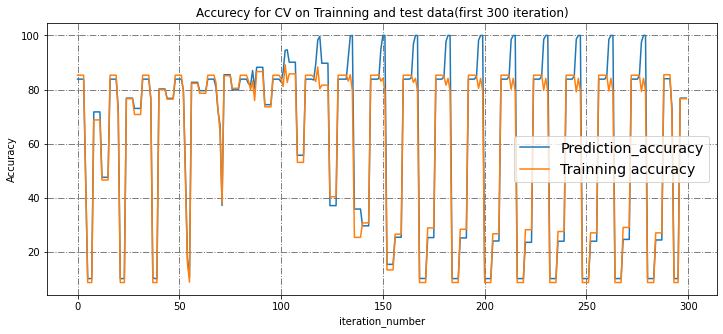

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(result_df[4][0:300],label='Prediction_accuracy')
plt.plot(result_df_pred[4][0:300],label='Trainning accuracy')
plt.title("Accurecy for CV on Trainning and test data(first 300 iteration)")
plt.xlabel('iteration_number')
plt.ylabel('Accuracy')
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show

In [13]:
# Overfit/underfit/generalfit check

bestIDx=np.argmax(np.array(results)[:,4])
worstIDX=np.argmin(np.array(results)[:,4])
print('best parameter',results[bestIDx])
print('worst parameter',results[worstIDX])
# pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

print('Testing on best parameter')
resultnp=np.array(results)
param.C=resultnp[bestIDx,0]
param.gamma=resultnp[bestIDx,1]
ker=resultnp[bestIDx,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[bestIDx,3])
m=svm_train(prob,param)
print('Train accurecy for best parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for best parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

## giving good results as it is not trainned to predict just one classs

# resultnp=np.array(results)
print('Testing on worst parameter')## worst model is not generalised model as trainn accu>>>test accu as it got overfit
param.C=resultnp[worstIDX,0]
param.gamma=resultnp[worstIDX,1]
ker=resultnp[worstIDX,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[worstIDX,3])
m=svm_train(prob,param)
print('Train accurecy for worst parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for worst parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart)*1000)

# Under fit as well as so useless only predicting 0
## check by running in different cell as output get overwrite.

best parameter [0.125, 1.0, 1, 4, 100.0]
worst parameter [0.125, 0.00390625, 1, 2, 10.291666666666668]
Testing on best parameter
Train accurecy for best parameter
Accuracy = 100% (2400/2400) (classification)
Test accurecy for best parameter
Accuracy = 79.5% (477/600) (classification)
Testing on worst parameter
Train accurecy for worst parameter
Accuracy = 10.2917% (247/2400) (classification)
Test accurecy for worst parameter
Accuracy = 8.83333% (53/600) (classification)
Time to Train(sec)= 15720434.99135971
